In [10]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
import mglearn
import matplotlib.pyplot as plt

In [11]:
x, y = mglearn.datasets.make_forge()

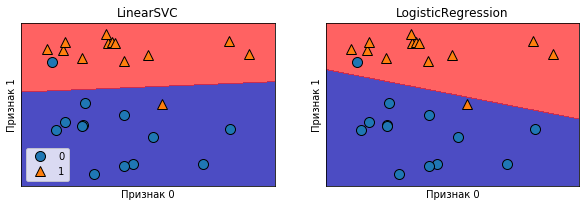

In [69]:
fig, axes = plt.subplots(1, 2, figsize=(10, 3))

for model, ax in zip([LinearSVC(max_iter=100000), LogisticRegression(max_iter=100000)], axes):
    clf = model.fit(x, y)
    mglearn.plots.plot_2d_separator(clf, x, ax=ax, fill=True, eps=.5, alpha=.7)
    mglearn.discrete_scatter(x[:, 0], x[:, 1], y, ax=ax)
    ax.set_title("{}".format(clf.__class__.__name__))
    ax.set_xlabel('Признак 0')
    ax.set_ylabel('Признак 1')
axes[0].legend()

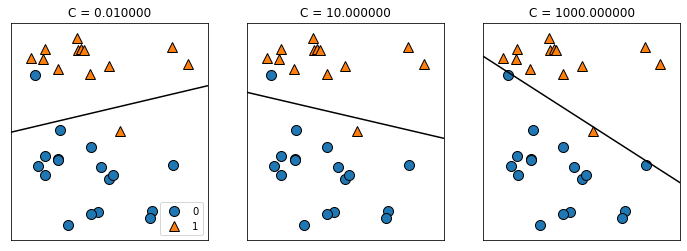

In [71]:
mglearn.plots.plot_linear_svc_regularization()

In [75]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

In [111]:
cancer = load_breast_cancer()
x_train, x_test, y_train, y_test = train_test_split(cancer.data, cancer.target, random_state=42)
logreg = LogisticRegression(max_iter=10000, C=1).fit(x_train, y_train)
logreg100 = LogisticRegression(max_iter=10000, C=100).fit(x_train, y_train)
logreg001 = LogisticRegression(max_iter=10000, C=.001).fit(x_train, y_train)
print(f'Правильность на обучающем наборе: {logreg.score(x_train, y_train)}')
print(f'Правильность на тестовом наборе: {logreg.score(x_test, y_test)}')

Правильность на обучающем наборе: 0.9624413145539906
Правильность на тестовом наборе: 0.965034965034965


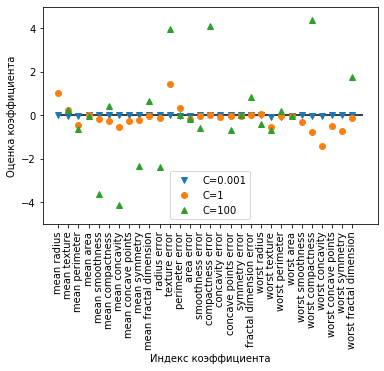

In [126]:
plt.plot(logreg001.coef_.T, 'v', label="C=0.001")
plt.plot(logreg.coef_.T, 'o', label="C=1")
plt.plot(logreg100.coef_.T, '^', label="C=100")
plt.xticks(range(cancer.data.shape[1]), cancer.feature_names, rotation=90)
plt.hlines(0, 0, cancer.data.shape[1])
plt.ylim(-5, 5)
plt.xlabel('Индекс коэффициента')
plt.ylabel('Оценка коэффициента')
plt.legend()

In [129]:
for C, marker in zip([0.001, 1, 100], ['o', '^', 'v']):
    lr_l1 = LogisticRegression(C=C, penalty='l1').fit(x_train, y_train)

ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.